In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
print(data.shape)
data.head()

(128, 27)


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
data.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [5]:
toDrop=['Date','Team','Opponent', '1st Goal', 'PSO', 'Own goals', 'Own goal Time']
numerical_features=['Goal Scored','Ball Possession %','Attempts','On-Target','Off-Target','Blocked','Corners','Offsides','Free Kicks','Saves','Pass Accuracy %',
                    'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Goals in PSO']
categorical_features=['Round']
boolean_features=['Yellow & Red', 'Red']

<AxesSubplot:>

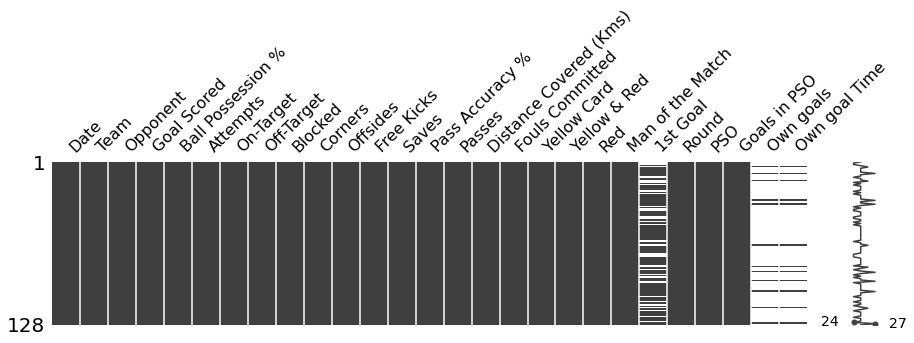

In [6]:
import missingno as msno

msno.matrix(data, figsize=(15,3))

In [7]:
data.columns[data.nunique() <= 1]

Index(['Own goals'], dtype='object')

In [8]:
data.drop(columns=toDrop, inplace=True)
print(data.shape)
data.columns

(128, 20)


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Man of the Match', 'Round', 'Goals in PSO'],
      dtype='object')

In [9]:
y = data['Man of the Match']
X = data.drop(columns=['Man of the Match'])

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

y = enc.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.shape, X_train.shape, X_test.shape

((128, 19), (89, 19), (39, 19))

In [43]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        #('boole', OrdinalEncoder(), boolean_features)
        ],
    remainder='passthrough'
    )

pre = Pipeline(steps=[('preprocessor', preprocessor)])

colNames = numerical_features + list(pd.get_dummies(X_train[categorical_features]).columns.values) + boolean_features

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=colNames)
X_test = pd.DataFrame(pre.transform(X_test), columns=colNames)

In [44]:
X_train

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Goals in PSO,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,Yellow & Red,Red
0,-0.243082,0.124193,0.493461,0.094188,-0.062499,1.097861,0.550516,-0.296413,1.705007,-1.316567,...,-0.565376,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.144513,0.738259,-0.465448,-0.371519,-0.857126,0.251890,0.113052,1.522947,2.347090,-0.284193,...,1.007077,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.144513,-0.694561,-1.807921,-1.302933,-1.651753,-1.017066,-1.199339,0.613267,0.420841,1.264368,...,-0.565376,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.243082,0.124193,0.493461,0.094188,-0.459812,1.520847,-1.199339,-0.296413,-0.221242,-0.800380,...,0.220850,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.243082,0.635915,-0.465448,0.094188,-0.062499,-1.017066,-0.761875,1.522947,0.634869,-0.800380,...,-0.565376,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.559779,0.533570,2.219498,1.957016,1.924069,1.097861,2.300372,-0.296413,-1.077353,0.231994,...,-1.351603,-0.262325,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
85,0.658348,0.328882,-0.273666,-0.837226,0.732128,-0.594081,0.550516,0.613267,0.420841,-0.284193,...,0.220850,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,-0.243082,-1.513316,-0.657230,0.094188,-0.459812,-1.017066,-2.074267,2.432628,1.062924,1.264368,...,1.007077,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,0.658348,0.738259,1.452370,0.559895,1.129442,1.520847,0.987980,1.522947,0.420841,-0.284193,...,-0.565376,-0.262325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)

In [46]:
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=111)

[0.6410256410256411, 0.5384615384615384, 0.717948717948718, 0.6153846153846154, 0.5641025641025641, 0.6153846153846154, 0.5641025641025641]


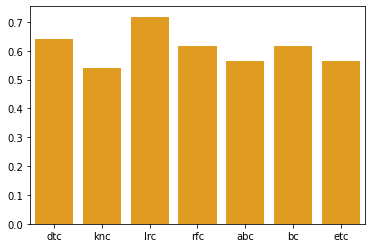

In [47]:
# train done using all 12 columns 
from sklearn.metrics import f1_score

models = ['dtc','knc','lrc', 'rfc','abc','bc','etc']

results1 = [f1_score(dtc.predict(X_test), y_test, average='micro'),
    f1_score(knc.predict(X_test), y_test, average='micro'), f1_score(lrc.predict(X_test), y_test, average='micro'),
    f1_score(rfc.predict(X_test), y_test, average='micro'), f1_score(abc.predict(X_test), y_test, average='micro'),
    f1_score(bc.predict(X_test), y_test, average='micro'), f1_score(etc.predict(X_test), y_test, average='micro')]

sns.barplot(x=models, y=results1, color='orange')

print(results1)

In [48]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(lrc)
sel.fit(X_train, y_train)

cols = X_train.columns[sel.get_support()]
cols

Index(['Goal Scored', 'Ball Possession %', 'Corners', 'Passes', 'Yellow Card',
       'Goals in PSO', 'Round_3rd Place', 'Round_Final', 'Round_Round of 16'],
      dtype='object')

In [49]:
X_train = pd.DataFrame(sel.transform(X_train), columns=cols)
X_test = pd.DataFrame(sel.transform(X_test), columns=cols)

print(X_train.shape)


(89, 9)


In [50]:
X_train

,Goal Scored,Ball Possession %,Corners,Passes,Yellow Card,Goals in PSO,Round_3rd Place,Round_Final,Round_Round of 16
0,-0.243082,0.124193,0.550516,-0.398542,-0.565376,-0.262325,0.0,0.0,0.0
1,-1.144513,0.738259,0.113052,0.177784,1.007077,-0.262325,0.0,0.0,0.0
2,-1.144513,-0.694561,-1.199339,-0.804590,-0.565376,-0.262325,0.0,0.0,0.0
3,-0.243082,0.124193,-1.199339,0.511791,0.220850,-0.262325,0.0,0.0,0.0
4,-0.243082,0.635915,-0.761875,0.485594,-0.565376,-0.262325,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
84,1.559779,0.533570,2.300372,0.937486,-1.351603,-0.262325,0.0,0.0,1.0
85,0.658348,0.328882,0.550516,-0.103830,0.220850,-0.262325,0.0,0.0,0.0
86,-0.243082,-1.513316,-2.074267,-1.269580,1.007077,-0.262325,0.0,0.0,0.0
87,0.658348,0.738259,0.987980,0.452848,-0.565376,-0.262325,0.0,0.0,0.0


In [52]:
lrc.fit(X_train, y_train)
f1_score(lrc.predict(X_test), y_test, average='micro')


0.7435897435897437

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lrc, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.2135 ± 0.0603,Goal Scored
0.0539 ± 0.0436,Yellow Card
0.0517 ± 0.0180,Round_Round of 16
0.0494 ± 0.0336,Goals in PSO
0.0427 ± 0.0558,Passes
0.0337 ± 0.0682,Corners
0.0270 ± 0.0463,Ball Possession %
0.0022 ± 0.0090,Round_Final
0.0022 ± 0.0090,Round_3rd Place


In [54]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "penalty": ['l1', 'l2'],
      "dual": [True, False],
      "C": [1.0, 1.5, 0.5],
      "fit_intercept":[True, False],
      "intercept_scaling": [1.0, 1.5, 0.5],
      "max_iter":[100, 75, 125],
      "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
      "tol": [0.0001, 0.00005]
      }

In [58]:

grid = GridSearchCV(estimator=LogisticRegression(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='f1_micro',
                    return_train_score=True,
                    n_jobs=-1,  
                    ) 

In [59]:
best_model = grid.fit(X_train,y_train)

In [60]:
print(best_model.best_params_)

{'C': 1.5, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}


In [67]:
lrc_best = LogisticRegression(C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.0, max_iter=100, penalty='l2', solver='liblinear', tol=0.0001)

lrc_best.fit(X_train, y_train)

print('lrc_best', f1_score(lrc_best.predict(X_test), y_test, average='micro'))

lrc_best 0.7435897435897437


In [64]:
print('Feature Coefficients of the Regression:- \n', lrc_best.coef_[0])

Feature Coefficients of the Regression:- 
 [ 1.38174943  0.62353527  0.36050447 -0.64395546 -0.50960728  0.59078423
  0.48883528 -0.96273974 -1.08386084]


In [68]:
from sklearn.metrics import classification_report

print (classification_report(y_test, lrc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.89      0.67      0.76        24

    accuracy                           0.74        39
   macro avg       0.75      0.77      0.74        39
weighted avg       0.79      0.74      0.75        39

